In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import spacy

In [9]:
r1 = pd.read_csv('Input/Risk_Factors_Voyage_1.csv')
r2 = pd.read_csv('Input/Risk_Factors_Voyage_2.csv')
r3 = pd.read_csv('Input/Risk_Factors_Voyage_3.csv')
risks = pd.concat([r1, r2, r3])
risks.reset_index(drop=True, inplace=True)

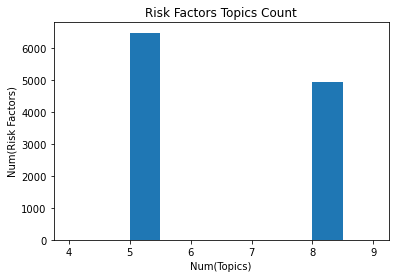

In [18]:
# Calculate the number of topics per row
risks['Num(Topics)'] = risks['LDA'].apply(lambda x: len(set(x.split(", "))))
risks['Num(Words)'] = risks['Info'].str.split().str.len()

# Count total unique topics
all_topics = set()
risks['LDA'].apply(lambda x: all_topics.update(x.split(", ")))
total_unique_topics = len(all_topics)

# Plotting the histogram
plt.hist(risks['Num(Topics)'], bins=10, range=(risks['Num(Topics)'].min() - 1, risks['Num(Topics)'].max() + 1))
plt.title('Risk Factors Topics Count')
plt.xlabel('Num(Topics)')
plt.ylabel('Num(Risk Factors)')
plt.show()

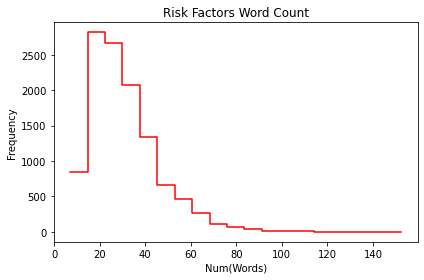

In [19]:

# Plotting the histogram (line plot of histogram data) for 'Num(Words)'
plt.subplot(1, 2, 2)  # subplot 2
n, bins, patches = plt.hist(risks['Num(Words)'], bins=20, color='gray', alpha=0.7)
plt.clf() # clear the histogram
plt.plot(bins[:-1], n, drawstyle='steps-post', color='red')  # using steps-post for proper alignment
plt.title('Risk Factors Word Count')
plt.xlabel('Num(Words)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()